In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Simple regression

In [562]:
# importing dataset
df = pd.read_csv('Salary_dataset.csv', delimiter=',')
df.size

90

In [563]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


We see that the average yoe for an employee is 5 and salary 76000 and the range for yoe is 1-10 and for salary is 37k-120k

In [564]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


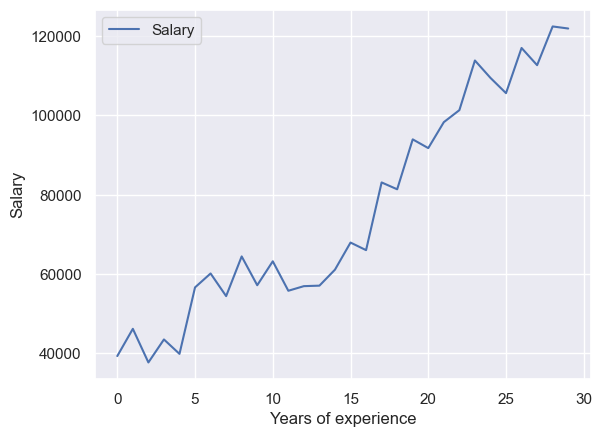

In [565]:
sns.set_theme(style="darkgrid")
plt.plot(df.index, df["Salary"], label="Salary")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

- As there are more years of experience, the salary is higher.
- There are some notably jumps, one at 5 years of experience and one in the period of 15-20 YoE.

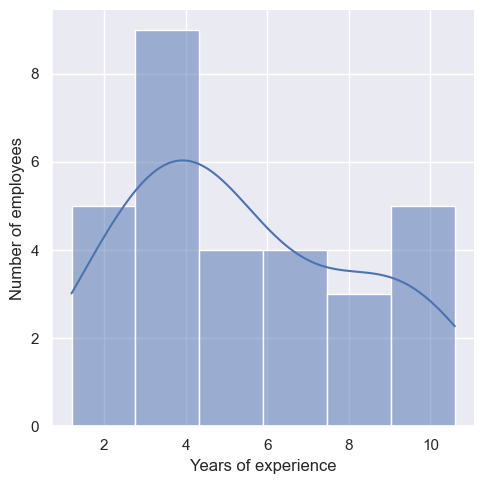

In [566]:
sns.displot(df['YearsExperience'], kde=True)
plt.xlabel("Years of experience")
plt.ylabel("Number of employees")
plt.show()

I see that our data has more entries about people with 4 YoE, it preceded by 2 and 10 yoe and the least entries are for 8 YoE.

## Training our model

In [567]:
df.iloc[:,1:2]

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [568]:
model = LinearRegression()

# split our data
X_train, X_test, y_train, y_test = train_test_split(np.array(df['YearsExperience']).reshape(-1,1), 
                                                    np.array(df['Salary']), 
                                                    test_size=0.4, 
                                                    random_state=42)
model.fit(X_train, y_train)

predicted_salary = model.predict(X_test)
print(predicted_salary)

[115942.4335911   72303.50533756 102943.60389856  76017.45667829
  56519.21213947  61161.65131538 122441.84843738 107586.04307447
  63947.11482092  37020.96760065  47234.33378765  74160.48100792]


In [569]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_salary)
r_squared = model.score(X_train, y_train)
print("Mean Squared Error:", mse)
print("R squared: ", r_squared)

Mean Squared Error: 37867393.388939455
R squared:  0.9591684852038581


Looking at MSE we see that we have a pretty big high error which means our model deviates a lot from normal regression line. The R squared is very close to 1 which means that years of experience directly influences the salary which the employees have.

## Multiple linear regression

In [570]:
# importing dataset
df = pd.read_csv('HousingData.csv', delimiter=',')
df.size

7084

In [571]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [572]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [573]:
# Data cleaning
df = df.dropna()
df = df.drop_duplicates()

## Dataset description
The variables give in the dataset are the following:
 - **crim** —per capita crime rate by town.
 - **zn** — proportion of residential land zoned for lots over 25,000 sq.ft.
 - **indus** — proportion of non-retail business acres per town.
 - **chas** — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 - **nox** — nitrogen oxides concentration (parts per 10 million).
 - **rm** — average number of rooms per dwelling.
 - **age** — proportion of owner-occupied units built prior to 1940.
 - **dis** — weighted mean of distances to five Boston employment centres.
 - **rad** — index of accessibility to radial highways.
 - **tax** — full-value property-tax rate per $10,000.
 - **ptratio** — pupil-teacher ratio by town.
 - **black** — 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town.
 - **lstat** — lower status of the population (percent).
 - **medv** — median value of owner-occupied homes in $1000s.


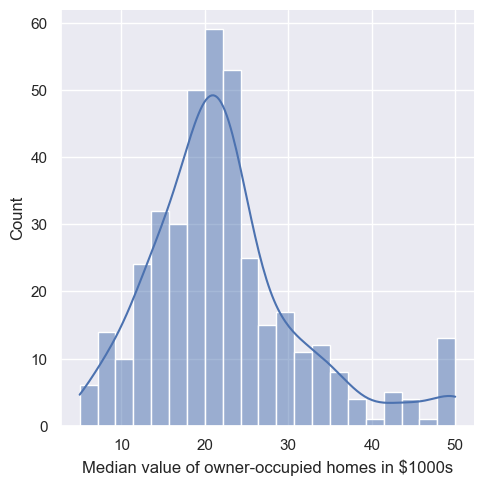

In [574]:
sns.displot(df['MEDV'], kde=True)
plt.xlabel("Median value of owner-occupied homes in $1000s")
plt.show()

As we see we have more data for locations with a medv between 20-30 range and the least data for location with data between 40-49, but suddenly we have burst of data for locations with 50.

## Correlation heatmap

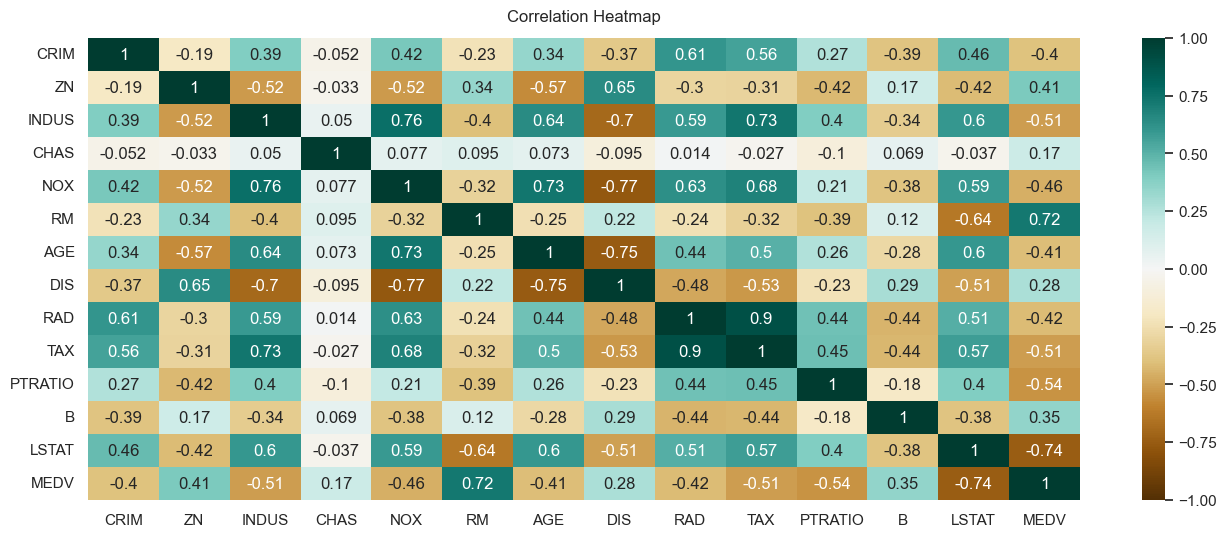

In [575]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As we look at our heatmap, we see that the most impactful fields on MEDV are RM, ZN and B, while the least impactful LSTAT, PRATIO, TAX and INDUS. 

## Training the model

In [576]:
X = df.iloc[:,0:13]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.4, 
                                                    random_state=42)

model.fit(X_train, y_train)

predicted_medv = model.predict(X_test)
print(predicted_medv)

[29.13886078 16.49684207 22.00202075 29.11982728 17.43855691 34.64791506
 22.20086358 30.03133952 32.40929264 16.72042186 22.04928501 42.81381989
 21.79176088 16.61299777 17.57885058 20.3554983  16.19754223 15.36751057
 20.42027215 13.67848237 17.64908088 20.00546178 16.12005485 28.50080169
 24.45294339 16.55238834 26.48222865 31.08176014 24.03399906 26.64872346
 41.72627049 17.31981924 19.87592599 16.09996144 17.25854333 20.60258214
 21.37035704 21.0439635  23.05802283 21.77275504 27.80882424 36.21711589
 20.81480074 30.16239887 35.18788855 19.87220127 24.24241207  8.14572353
 20.44357494 25.13096799 21.87097971 24.35456502 15.18713627 17.50383431
 18.37298495 23.00191638 44.43214663 22.84008117 15.32644312 22.44777724
 21.2510845  21.75343808 14.56272842 28.28243434 -4.2767402  33.00328371
 16.09722361 31.60212146 24.84762019 20.40839702 32.53396874 33.24443623
 17.21343931 19.93807581 18.23988993 37.12857379 20.28839093 29.01898963
 17.33917724 15.22852624 39.08858077 24.28738574 24

In [577]:
mse = mean_squared_error(y_test, predicted_medv)
r_squared = model.score(X_train, y_train)
print("Mean Squared Error:", mse)
print("R squared: ", r_squared)

Mean Squared Error: 30.5286526921474
R squared:  0.8173273601936006


As we look, the MSE is pretty close to 0 which means that our model perfroms pretty well, also our r squared is close to 1 which means that our predictors has a very a high impact on the output.